<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [4]:
df = pd.read_csv("/content/airline_passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [8]:
df.dropna(axis = 0,inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
df.set_index("Month",inplace = True)

In [13]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


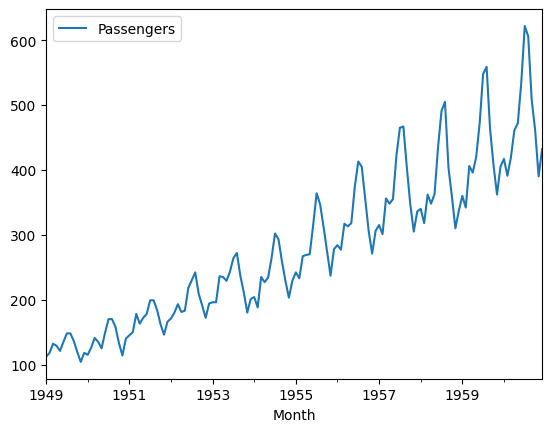

In [14]:
df.plot();

In [16]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adf_test(series):
  result = adfuller(series)
  print("ADF Statistics: {}".format(result[0]))
  print("p - value : {}".format(result[1]))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis,it is stationary data")
  else:
    print("Weak evidence against the null hypothesis,indicating it is non-stationary")

In [19]:
adf_test(df['Passengers'])

ADF Statistics: 0.8153688792060498
p - value : 0.991880243437641
Weak evidence against the null hypothesis,indicating it is non-stationary


In [20]:
#In order to make the data stationary
#Use technique differencing
df['Passengers first difference'] = df['Passengers'] - df['Passengers'].shift(1)

In [21]:
df.head()

,Passengers,Passengers first difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [23]:
adf_test(df['Passengers first difference'].dropna())

ADF Statistics: -2.8292668241700047
p - value : 0.05421329028382478
Weak evidence against the null hypothesis,indicating it is non-stationary


In [24]:
df['Passengers second difference'] = df['Passengers first difference'] - df['Passengers first difference'].shift(1)

In [25]:
adf_test(df['Passengers second difference'].dropna())

ADF Statistics: -16.384231542468513
p - value : 2.7328918500142026e-29
Strong evidence against the null hypothesis, reject the null hypothesis,it is stationary data


In [34]:
df['Passengers 12 difference'] = df['Passengers'] - df['Passengers'].shift(12)

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

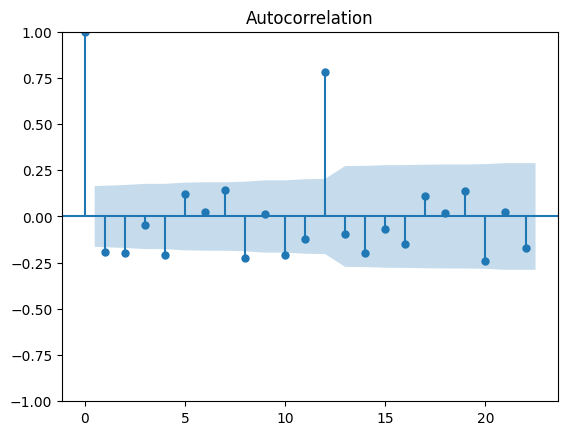

In [28]:
acf = plot_acf(df['Passengers second difference'].dropna())

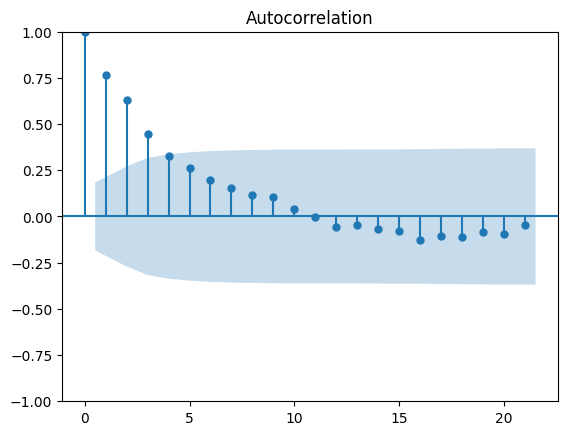

In [36]:
#q = 4, line above the upper boundary
acf12 = plot_acf(df['Passengers 12 difference'].dropna())

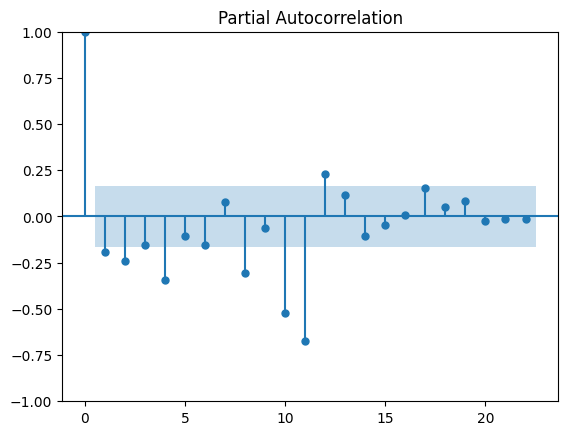

In [30]:
result = plot_pacf(df['Passengers second difference'].dropna())

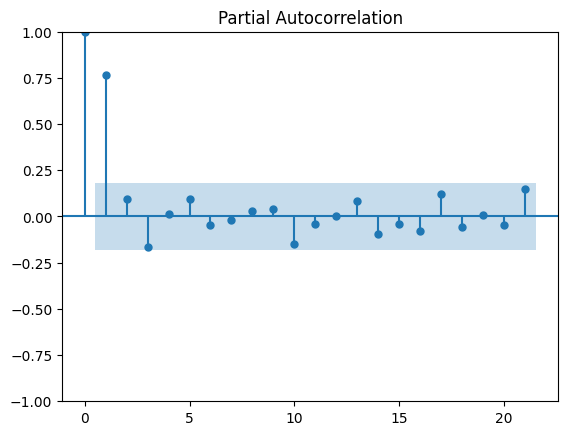

In [38]:
#p = 2
pacf12 = plot_pacf(df['Passengers 12 difference'].dropna())

In [39]:
df.head()

,Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,NaN,NaN,NaN,NaN
1949-02-01,NaN,6.0,NaN,NaN
1949-03-01,NaN,14.0,8.0,NaN
1949-04-01,NaN,-3.0,-17.0,NaN
1949-05-01,NaN,-8.0,-5.0,NaN


In [40]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [43]:
#timedelta(days = 1) - plus 1 day
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end + timedelta(days = 1) : test_dataset_end]

In [42]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [45]:
test_data.head()

,Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1956-01-01,302.0,6.0,-35.0,38.0
1956-02-01,293.0,-7.0,-13.0,21.0
1956-03-01,259.0,40.0,47.0,22.0
1956-04-01,229.0,-4.0,-44.0,18.0
1956-05-01,203.0,5.0,9.0,23.0


In [46]:
train_data.head()

,Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,NaN,NaN,NaN,NaN
1949-02-01,NaN,6.0,NaN,NaN
1949-03-01,NaN,14.0,8.0,NaN
1949-04-01,NaN,-3.0,-17.0,NaN
1949-05-01,NaN,-8.0,-5.0,NaN


In [49]:
import statsmodels.api as sm

In [68]:
# p =10,i = 2,q =12
# i - number of differencing
# p count from pacf graph, the number of line between outbounded lines
# 1 count from acf graph, the number of line between outbounded lines
model_ARIMA = sm.tsa.arima.ARIMA(train_data['Passengers'],order=(10,2,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
model_arima_fit = model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   84
Model:               ARIMA(10, 2, 12)   Log Likelihood                -258.899
Date:                Sun, 05 Nov 2023   AIC                            563.798
Time:                        15:02:12   BIC                            619.153
Sample:                    01-01-1949   HQIC                           586.022
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0245      0.286      0.086      0.932      -0.536       0.585
ar.L2         -1.0227      0.296     -3.453      0.001      -1.603      -0.442
ar.L3          0.1276      0.536      0.238      0.812      -0.923       1.178
ar.L4         -1.1015      0.595     -1.851      0.064      -2.268       0.065
ar.L5          0.1403      0.718      0.195      0.845      -1.266       1.547
ar.L6         -1.0824      0.592     -1.830      0.067      -2.242       0.077
ar.L7          0.1375      0.493      0.279      0.780      -0.829       1.104
ar.L8         -1.0323      0.242     -4.268      0.000      -1.506      -0.558
ar.L9          0.0231      0.267      0.086      0.931      -0.501       0.547
ar.L10        -0.9671      0.101     -9.620      0.000      -1.164      -0.770
ma.L1         -1.1416     10.836     -0.105      0.916     -22.379      20.096
ma.L2          1.1664      2.513      0.464      0.643      -3.759       6.091
ma.L3         -1.2216     11.707     -0.104      0.917     -24.167      21.724
ma.L4          1.5375      3.667      0.419      0.675      -5.649       8.724
ma.L5         -1.3500     15.472     -0.087      0.930     -31.674      28.974
ma.L6          1.0993      3.218      0.342      0.733      -5.207       7.406
ma.L7         -1.3640     13.500     -0.101      0.920     -27.824      25.096
ma.L8          1.4166      5.505      0.257      0.797      -9.373      12.207
ma.L9         -1.3128     13.201     -0.099      0.921     -27.185      24.560
ma.L10         0.8557      3.003      0.285      0.776      -5.031       6.742
ma.L11        -0.8316      7.724     -0.108      0.914     -15.970      14.307
ma.L12         0.1508      1.473      0.102      0.919      -2.737       3.039
sigma2       106.5731   1177.249      0.091      0.928   -2200.792    2413.938
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.25   Prob(JB):                         0.88
Heteroskedasticity (H):              12.58   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [72]:
pred = model_arima_fit.predict(start = pred_start_date,end = pred_end_date)

In [73]:
residuals = test_data['Passengers'] - pred
residuals

Month
1956-01-01     21.228530
1956-02-01     -1.940261
1956-03-01    -17.330707
1956-04-01    -13.399459
1956-05-01    -20.698684
1956-06-01     -3.618032
1956-07-01     13.732895
1956-08-01      9.880825
1956-09-01     10.250925
1956-10-01     16.619794
1956-11-01     17.689546
1956-12-01     29.671515
1957-01-01     63.126189
1957-02-01     31.307048
1957-03-01     11.955444
1957-04-01      7.418191
1957-05-01    -13.544066
1957-06-01     24.718228
1957-07-01     33.515277
1957-08-01     29.998592
1957-09-01     39.613945
1957-10-01     39.199997
1957-11-01     47.588577
1957-12-01     67.469540
1958-01-01     91.679786
1958-02-01     69.390044
1958-03-01     30.698591
1958-04-01     15.488339
1958-05-01     -5.812840
1958-06-01     31.332303
1958-07-01     42.710537
1958-08-01     29.488389
1958-09-01     58.419632
1958-10-01     52.638124
1958-11-01     65.718407
1958-12-01     94.979588
1959-01-01    122.833302
1959-02-01    112.106555
1959-03-01     55.218616
1959-04-01     32.5

<Axes: ylabel='Density'>

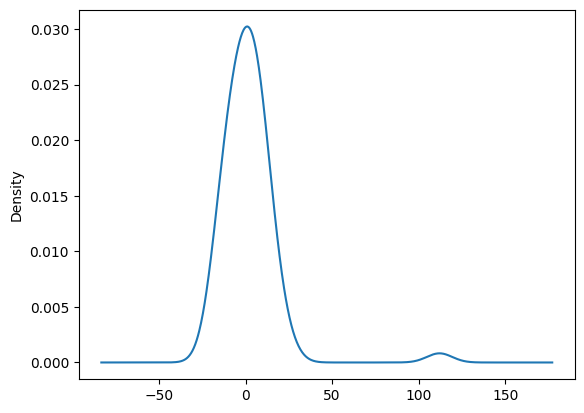

In [74]:
model_arima_fit.resid.plot(kind = 'kde')

In [75]:
test_data['Predicted ARIMA'] = pred

<ipython-input-75-92dd4fde6cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted ARIMA'] = pred


<Axes: xlabel='Month'>

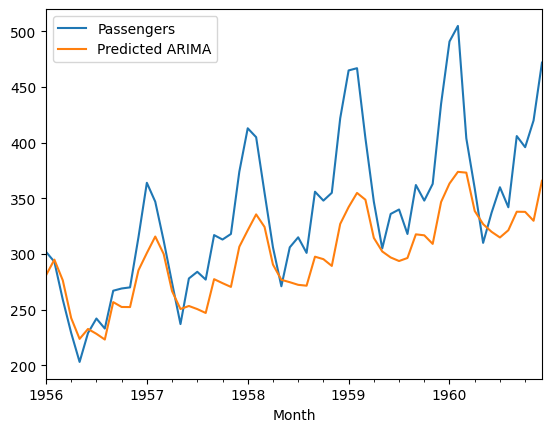

In [76]:
test_data[['Passengers','Predicted ARIMA']].plot()

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [120]:
model_sarima = SARIMAX(train_data['Passengers'],order = (4,0,5),seasonal_order = (0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [121]:
model_sarima_fit = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                   84
Model:             SARIMAX(4, 0, 5)x(0, 1, [], 12)   Log Likelihood                -289.140
Date:                             Sun, 05 Nov 2023   AIC                            598.279
Time:                                     15:31:50   BIC                            621.046
Sample:                                 01-01-1949   HQIC                           607.343
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9678      1.448      0.668      0.504      -1.871       3.806
ar.L2         -0.8598      1.874     -0.459      0.646      -4.532       2.813
ar.L3          0.3848      1.899      0.203      0.839      -3.337       4.107
ar.L4          0.3649      1.253      0.291      0.771      -2.090       2.820
ma.L1         -0.3298      1.525     -0.216      0.829      -3.319       2.660
ma.L2          1.1335      1.061      1.069      0.285      -0.945       3.212
ma.L3         -0.0277      1.998     -0.014      0.989      -3.944       3.888
ma.L4          0.2468      0.592      0.417      0.677      -0.914       1.408
ma.L5         -0.0528      0.590     -0.089      0.929      -1.209       1.104
sigma2        73.8023     31.381      2.352      0.019      12.297     135.308
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                11.74
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              16.88   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [123]:
pred_sarima = model_sarima_fit.predict(start = datetime(1960,6,6),end = datetime(1960,12,1))

In [115]:
residuals = test_data['Passengers'] - pred_sarima
residuals

1956-01-01           NaN
1956-02-01           NaN
1956-03-01           NaN
1956-04-01           NaN
1956-05-01           NaN
1956-06-01           NaN
1956-07-01           NaN
1956-08-01           NaN
1956-09-01           NaN
1956-10-01           NaN
1956-11-01           NaN
1956-12-01           NaN
1957-01-01           NaN
1957-02-01           NaN
1957-03-01           NaN
1957-04-01           NaN
1957-05-01           NaN
1957-06-01           NaN
1957-07-01           NaN
1957-08-01           NaN
1957-09-01           NaN
1957-10-01           NaN
1957-11-01           NaN
1957-12-01           NaN
1958-01-01           NaN
1958-02-01           NaN
1958-03-01           NaN
1958-04-01           NaN
1958-05-01           NaN
1958-06-01           NaN
1958-07-01           NaN
1958-08-01           NaN
1958-09-01           NaN
1958-10-01           NaN
1958-11-01           NaN
1958-12-01           NaN
1959-01-01           NaN
1959-02-01           NaN
1959-03-01           NaN
1959-04-01           NaN


<Axes: xlabel='Month'>

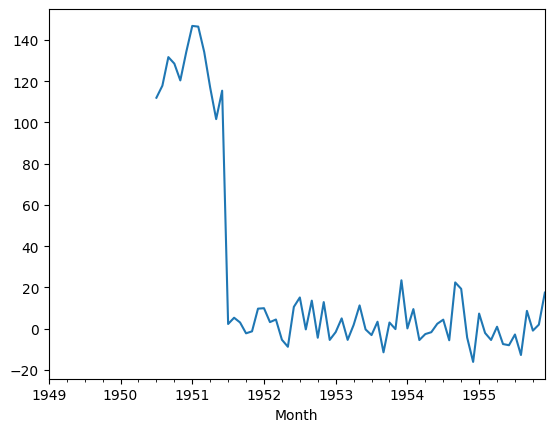

In [124]:
model_sarima_fit.resid.plot()

<Axes: ylabel='Density'>

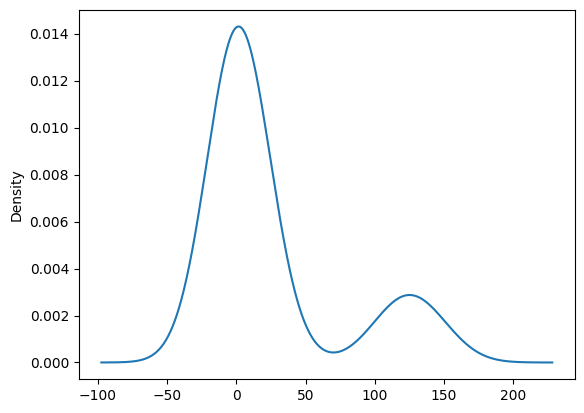

In [125]:
model_sarima_fit.resid.plot(kind = 'kde')

In [126]:
test_data['Predicted SARIMA'] = pred_sarima

<ipython-input-126-b0054cbfb824>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted SARIMA'] = pred_sarima


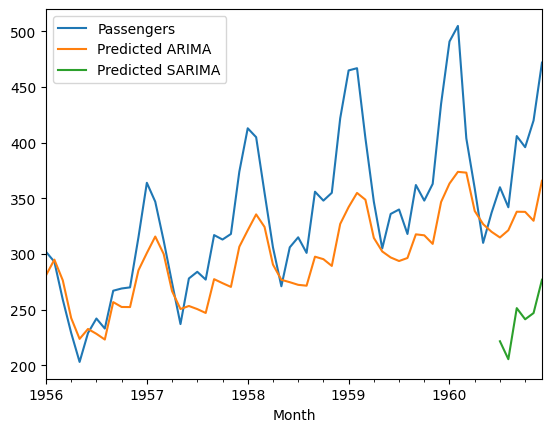

In [127]:
test_data[['Passengers','Predicted ARIMA','Predicted SARIMA']].plot();